# Bloque 2: Modelos Supervisados

In [1]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


## Métricas de rendimiento para modelos de clasificación binarios
En los problemas de clasificación de clase binarios, en la que los resultados se etiquetan positivos (P) o negativos (N), hay cuatro posibles resultados que se pueden obtener:
* Verdaderos Positivos (TP)
* Verdaderos Negativos (TN)
* Falsos Positivos (FP) o Error tipo I
* Falsos Negativos (FN) o Error de tipo II

Para facilitar el análisis, los resultados se pueden organizar en una matriz de confusión:

$$
\left|
\begin{array}{cc}
TP & FP \\
FN & TN \\
\end{array}
\right|
$$

A partir de estos resultados se pueden construir diferentes métricas para evaluarla calidad de los modelos construidos, algunas de las más utilizadas son:
* Precisión (Accuracy): $A = \frac{TP + TN}{TP + FP + TN + FN}$
* Exactitud (Precision): $P = \frac{TP}{TP + FP}$
* Exhaustividad (Recall): $R = \frac{TP}{TP + FN}$
* Área bajo la curva ROC (ROC AUC)

En *scikit-learn* todas estas métricas se encuentran en la librería `metrics`. Se pueden probar en un conjunto de datos conocido.

La matriz de confusión es 
[[5 2]
 [3 6]]
Precisión: 0.6875
Exactitud: 0.75
Exhaustividad: 0.6666666666666666
AUC: 0.6904761904761905


Text(0.5, 1.0, 'AUC = 0.69')

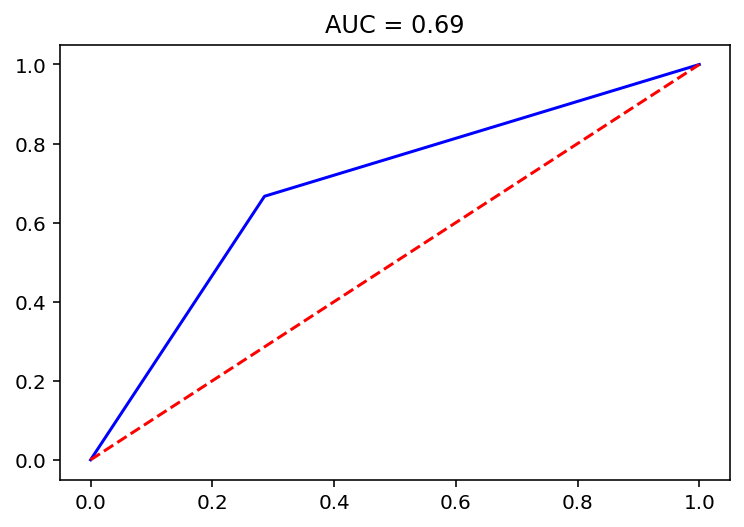

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_true = [0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1]

print(u'La matriz de confusión es ')
print(confusion_matrix(y_true, y_pred))

print(u'Precisión:', accuracy_score(y_true, y_pred))
print(u'Exactitud:', precision_score(y_true, y_pred))
print(u'Exhaustividad:', recall_score(y_true, y_pred))

false_positive_rate, recall, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(false_positive_rate, recall)

print(u'AUC:', roc_auc)

plot(false_positive_rate, recall, 'b')
plot([0, 1], [0, 1], 'r--')
title(u'AUC = %0.2f' % roc_auc)

En este ejemplo se puede ver que los la precisión del modelo es de 69%, 11 aciertos de 16 casos. La exactitud es 75%, 6 aciertos positivos para 8 positivos identificados por el modelo. La exhaustividad es de 66 %, 6 aciertos positivos para 9 que positivos existen en los datos.

A la hora de evaluar la calidad de los modelos este proceso va a ser necesario repetir este proceso, por lo que puede ser una buena idea crear una función que permita repetir el proceso de una forma rápida. 

La matriz de confusión es 
[[5 2]
 [3 6]]
Precisión: 0.6875
Exactitud: 0.75
Exhaustividad: 0.6666666666666666
AUC: 0.6904761904761905


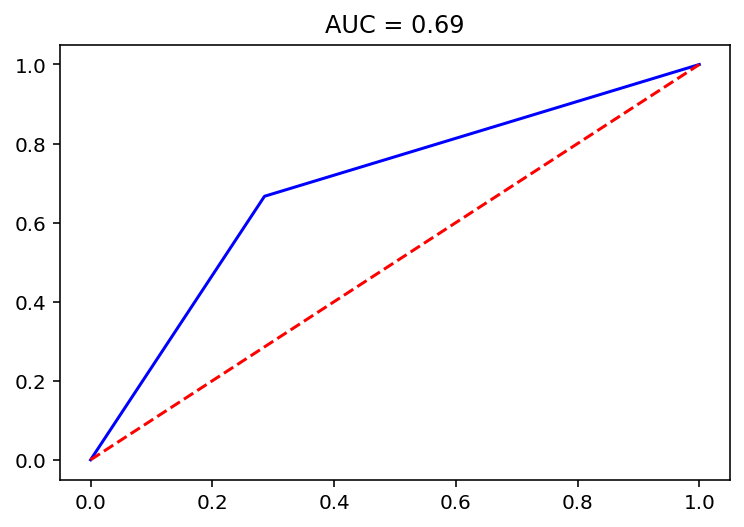

In [3]:
def metricas(y_true, y_pred):
    print(u'La matriz de confusión es ')
    print(confusion_matrix(y_true, y_pred))

    print(u'Precisión:', accuracy_score(y_true, y_pred))
    print(u'Exactitud:', precision_score(y_true, y_pred))
    print(u'Exhaustividad:', recall_score(y_true, y_pred))

    false_positive_rate, recall, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(false_positive_rate, recall)

    print(u'AUC:', roc_auc)

    plot(false_positive_rate, recall, 'b')
    plot([0, 1], [0, 1], 'r--')
    title(u'AUC = %0.2f' % roc_auc)
    
metricas(y_true, y_pred)

## Preparación de un conjunto de datos de ejemplo
En el resto de la unidad se va a utilizar un conjunto de datos de ejemplo generado con el método `make_classification`. En este caso se van a generar 2500 muestras con 10 características.

Posteriormente los resultados se van a separar en un conjunto de entrenamiento y test con el método ` train_test_split`.

In [4]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples = 2500,
                           n_features = 10,
                           n_redundant = 0,
                           random_state = 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

## Creación de modelos de clasificación
### Regresión logística
La clasificación binaria de eventos se puede realizar a partir de un modelo regresión logística donde se utiliza la expresión:
$$
F(x) = \frac{1}{1 + e^{\sum-w_ix_i}}
$$

En *scikit-learn* el constructor con el que se puede crear un modelo de regresión logística es `LogisticRegression`. A modo de ejemplo se puede crear y evaluar para para el conjunto de datos generado previamente.

La matriz de confusión es 
[[838  92]
 [ 62 883]]
Precisión: 0.9178666666666667
Exactitud: 0.9056410256410257
Exhaustividad: 0.9343915343915344
AUC: 0.9177334016043693


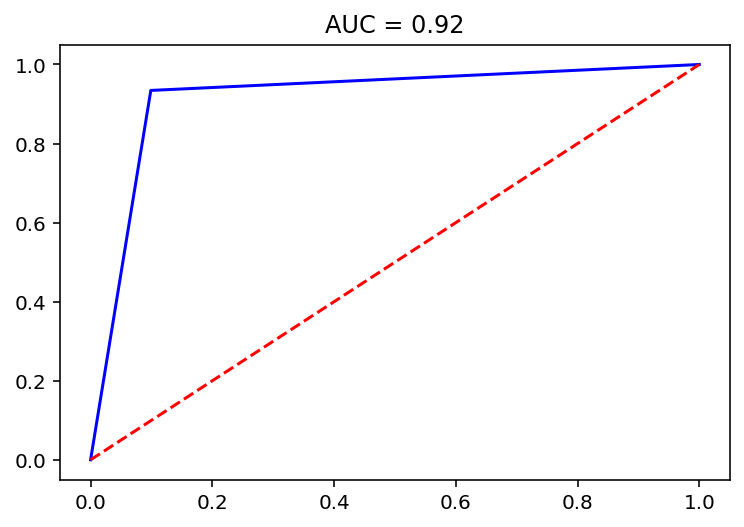

In [5]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression().fit(X_train, y_train)
y_train_pred = lr_classifier.predict(X_train)

metricas(y_train, y_train_pred)

Al tener 10 características es necesario comprobar que no se ha creado un modelo sobreajustado, para ello se evaluar el rendimiento del modelo en el conjunto de datos de test.

La matriz de confusión es 
[[291  31]
 [ 15 288]]
Precisión: 0.9264
Exactitud: 0.9028213166144201
Exhaustividad: 0.9504950495049505
AUC: 0.9271108787897423


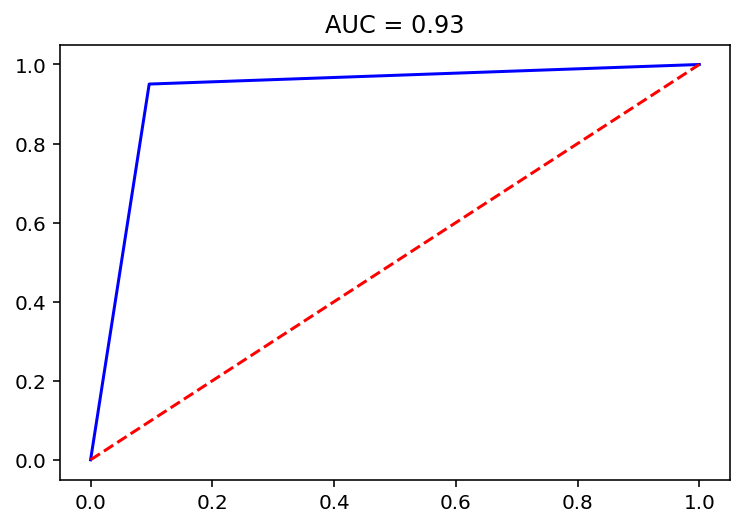

In [6]:
y_test_pred  = lr_classifier.predict(X_test)

metricas(y_test, y_test_pred)

En este ejemplo se puede observar que tanto el modelo en el conjunto de datos de entrenamiento y validación son similares, indicando que el modelo probablemente no se encuentre sobreajustado. En este caso se pude observar que la precisión es ligeramente superior en el conjunto de datos de validación, esto no es lo habitual, pero se puede observar debido a que existe una incertidumbre el valor por ser el conjunto una muestra de los datos.

# Modificación del criterio de predicción
En *scikit-learn* no existe una función que permita cambiar el criterio utilizado para decir si un registro es positivo o negativo. Lo que existe es un método de la clase `LogisticRegression` (`predict_proba`) con el que se puede obtener la probabilidad de que el registro sea positivo o negativo. A partir de esto se puede realizar una predicción con un umbral diferente.

Al llamar al método `predict_proba` se tiene:

In [7]:
lr_classifier.predict_proba(X_test)

array([[0.97750827, 0.02249173],
       [0.01926135, 0.98073865],
       [0.99692706, 0.00307294],
       ...,
       [0.01914597, 0.98085403],
       [0.02646548, 0.97353452],
       [0.46143196, 0.53856804]])

Una matriz en la que la primera columna es la probabilidad de que el registro sea falso y una segunda columna en la que tenían la probabilidad que te registro sea cierto. Con la segunda columna podemos realizar nuevas predicciones con diferentes umbrales. Podemos ver que en el caso de utilizar el valor de 0,5 tendremos la predicción original

La matriz de confusión es 
[[291  31]
 [ 15 288]]
Precisión: 0.9264
Exactitud: 0.9028213166144201
Exhaustividad: 0.9504950495049505
AUC: 0.9271108787897423


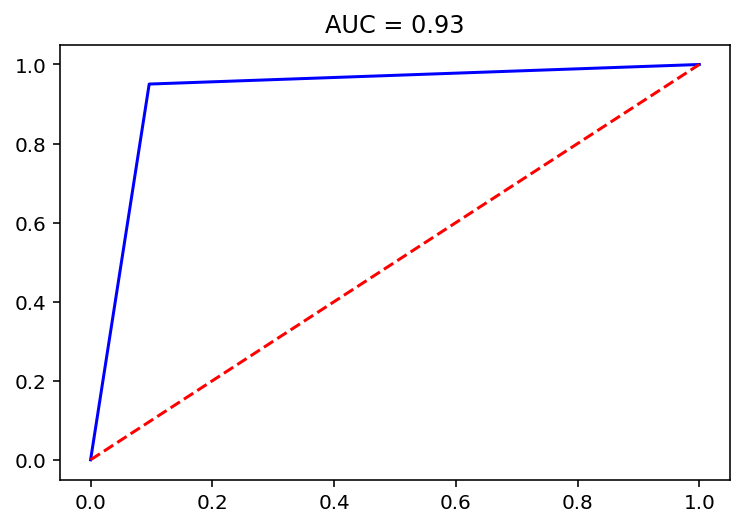

In [8]:
metricas(y_test, lr_classifier.predict_proba(X_test)[:,1] > 0.5)

En el caso de aumentar el umbral a 0,7 tendremos una menor precisión, una mayor exactitud a costa de una menor exhaustividad.

La matriz de confusión es 
[[299  23]
 [ 33 270]]
Precisión: 0.9104
Exactitud: 0.9215017064846417
Exhaustividad: 0.8910891089108911
AUC: 0.9098302687411599


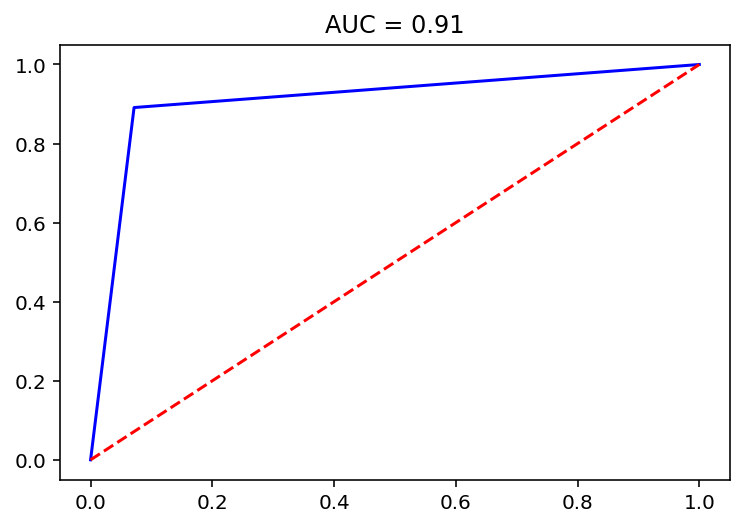

In [9]:
metricas(y_test, lr_classifier.predict_proba(X_test)[:,1] > 0.7)

Por otro lado, el caso de bajar el valor a 0,3 ocurrirá justamente lo contrario con los valores de la exactitud y exhaustividad.

La matriz de confusión es 
[[271  51]
 [  9 294]]
Precisión: 0.904
Exactitud: 0.8521739130434782
Exhaustividad: 0.9702970297029703
AUC: 0.9059559682676341


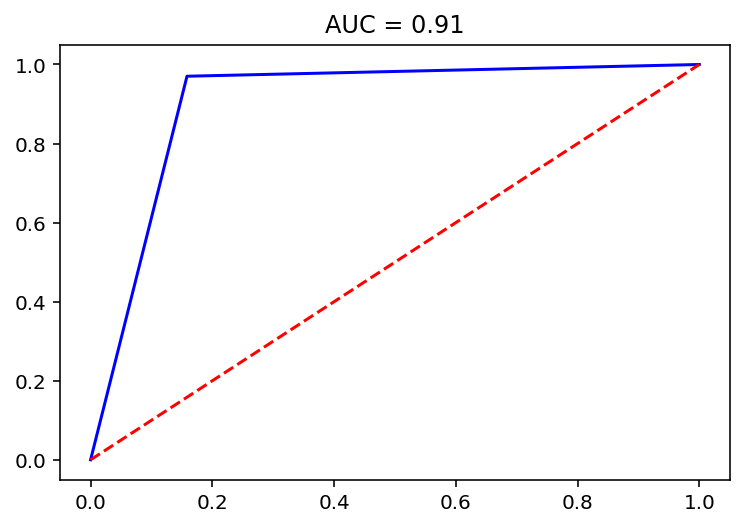

In [10]:
metricas(y_test, lr_classifier.predict_proba(X_test)[:,1] > 0.3)

### Árboles de decisión
En los árboles de decisión se construyen diagramas de construcciones lógicas, muy similares a los sistemas de predicción basados en reglas, que sirven para representar y categorizar una serie de condiciones que ocurren de forma sucesiva, para la resolución de un problema.

En *scikit-learn* el constructor con el que se puede crear un modelo basado en árboles de decisión es ` DecisionTreeClassifier`. A modo de ejemplo se puede crear y evaluar para para el conjunto de datos generado previamente.

La matriz de confusión es 
[[930   0]
 [  0 945]]
Precisión: 1.0
Exactitud: 1.0
Exhaustividad: 1.0
AUC: 1.0


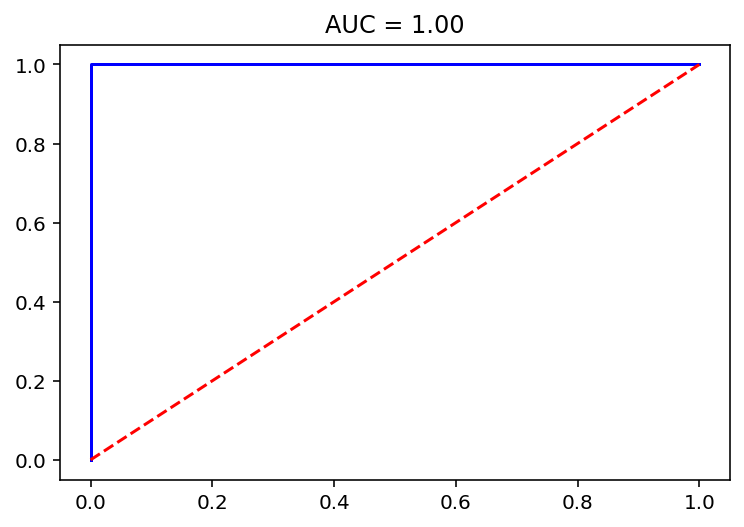

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = dt_classifier.predict(X_train)

metricas(y_train, y_pred)

Los resultados muestran un modelo perfecto, esto puede hacer sospechar la existencia de sobreajuste. Para comprobarlo se puede utilizar el conjunto de datos de test.

La matriz de confusión es 
[[291  31]
 [ 34 269]]
Precisión: 0.896
Exactitud: 0.8966666666666666
Exhaustividad: 0.8877887788778878
AUC: 0.895757743476211


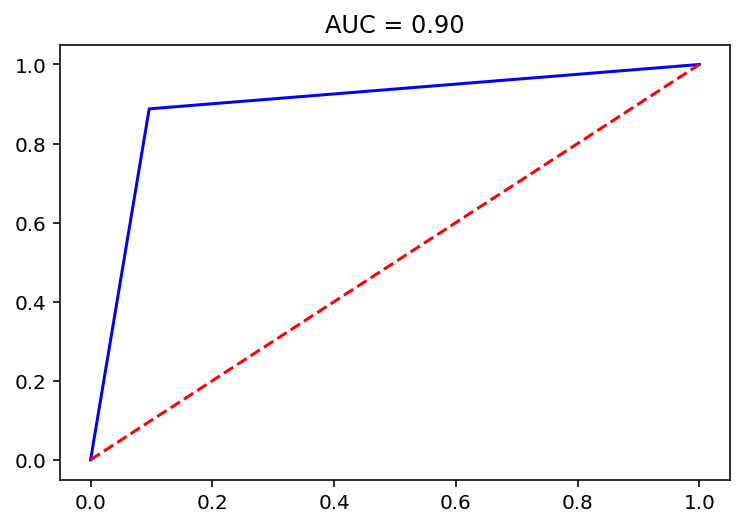

In [12]:
y_test_pred  = dt_classifier.predict(X_test)

metricas(y_test, y_test_pred)

Se puede ver que la precisión del modelo cae al 90%, esto es así porque el árbol de decisión continúa dividiendo las ramas hasta conseguir un modelo perfecto. Para evitar esto se puede limitar la profundidad del árbol utilizando la opción `max_depth` en el constructor. 

La matriz de confusión es 
[[840  90]
 [ 30 915]]
Precisión: 0.936
Exactitud: 0.9104477611940298
Exhaustividad: 0.9682539682539683
AUC: 0.9357398873527907


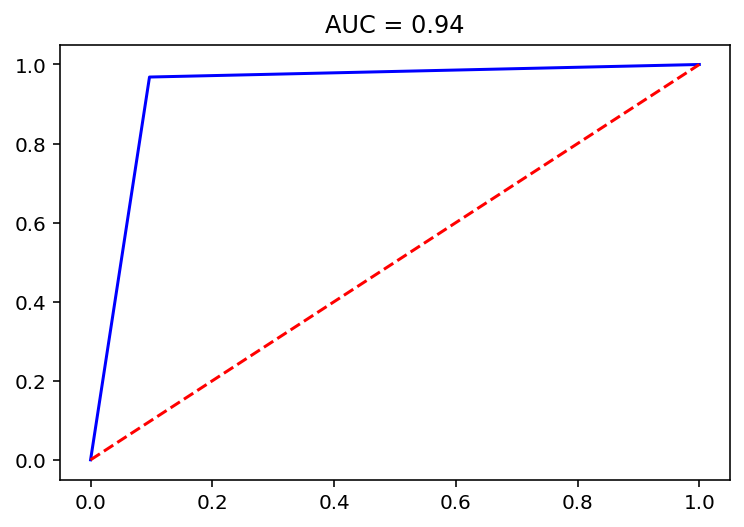

In [13]:
dt_classifier = DecisionTreeClassifier(max_depth = 4).fit(X_train, y_train)
y_pred = dt_classifier.predict(X_train)

metricas(y_train, y_pred)

Ahora, al evaluar los resultados en el conjunto de test:

La matriz de confusión es 
[[293  29]
 [  7 296]]
Precisión: 0.9424
Exactitud: 0.9107692307692308
Exhaustividad: 0.976897689768977
AUC: 0.9434177889838673


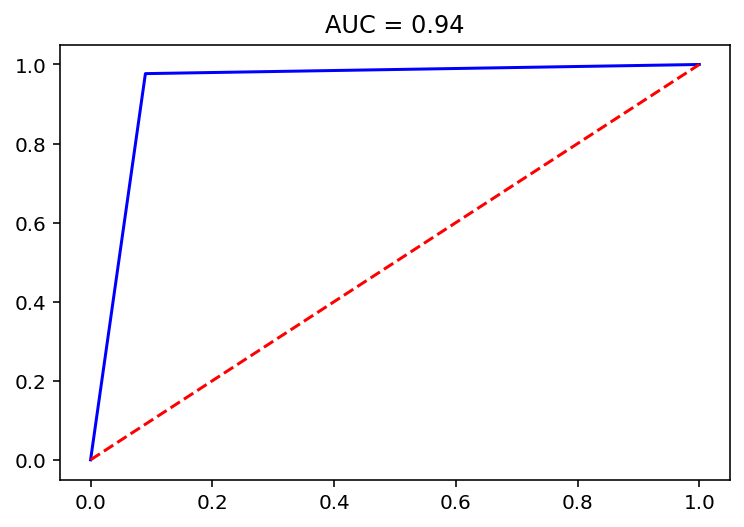

In [14]:
y_test_pred  = dt_classifier.predict(X_test)

metricas(y_test, y_test_pred)

El nuevo modelo aparentemente no se encuentra sobreajustado.

La profundidad del árbol determina la capacidad de este para realizar predicciones exitosas y para evitar el sobreajuste. Es un parámetro del modelo que se ha de fijar para cada problema.

#### Importancia de las características
En los arboles de decisión se puede evaluar la importancia de cada una de las características utilizadas mediante el uso de la propiedad `feature_importances_`. Esto permite determinar cuáles son las características más importantes para determinar veracidad de la clase. Esto también se puede utilizar para construir modelos más simples con menos características.

In [15]:
print(dt_classifier.feature_importances_)

[7.43174953e-02 0.00000000e+00 9.22971312e-01 0.00000000e+00
 5.90750471e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.12044268e-03]


Ahora se puede crear un modelo únicamente con las características que tenga un valor positivo. 

Características utilizadas 4 de 10

La matriz de confusión es 
[[840  90]
 [ 30 915]]
Precisión: 0.936
Exactitud: 0.9104477611940298
Exhaustividad: 0.9682539682539683
AUC: 0.9357398873527907


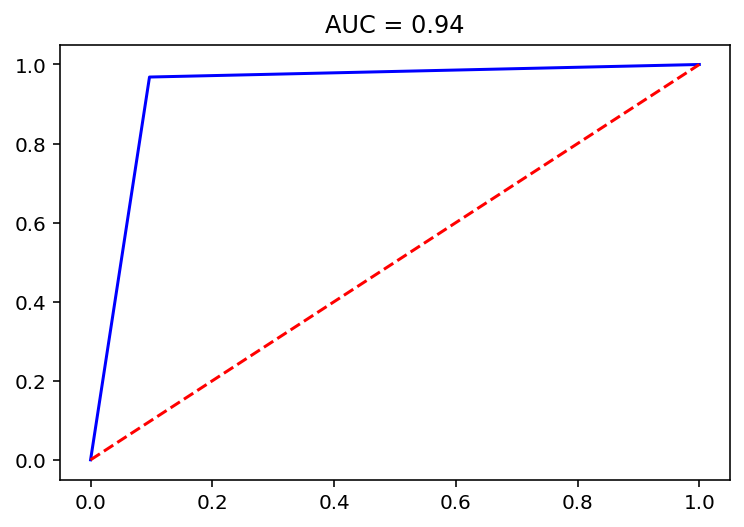

In [16]:
valid_features = dt_classifier.feature_importances_ > 0

print(u'Características utilizadas %d de %d\n' % (sum(valid_features) , len(valid_features)))

dt_classifier_sub = DecisionTreeClassifier(max_depth = 4)
dt_classifier_sub.fit(X_train[:, valid_features], y_train)
y_pred = dt_classifier_sub.predict(X_train[:, valid_features])

metricas(y_train, y_pred)

Se ha obtenido el mismo modelo solamente con 4 características de las 10. Este modelo es más sencillo que el anterior. Se puede comprobar que el conjunto de test no se ve afectado.

La matriz de confusión es 
[[293  29]
 [  7 296]]
Precisión: 0.9424
Exactitud: 0.9107692307692308
Exhaustividad: 0.976897689768977
AUC: 0.9434177889838673


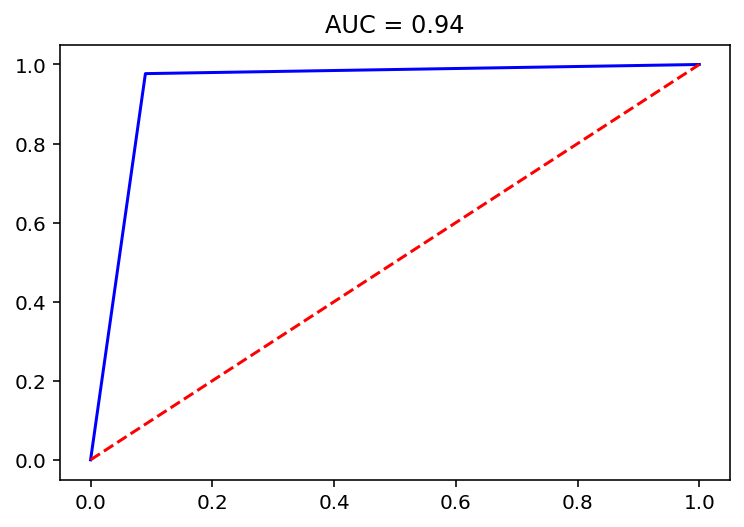

In [17]:
y_test_pred  = dt_classifier_sub.predict(X_test[:, valid_features])

metricas(y_test, y_test_pred)

#### Criterios de selección
A la hora de crear la división de los en los árboles de decisión se pueden utilizar diferentes criterios, entre los que se puede destacar:
* Entropía ("entropy")
* Índice Gini ("Gini index")

En *scikit-learn* el criterio por defecto es el índice Gini, este se puede cambiar utilizando la opción `criterion` en el constructor. Por ejemplo, se pueden comprobar los resultados que se obtendrían al utilizar la entropía.

La matriz de confusión es 
[[830 100]
 [ 27 918]]
Precisión: 0.9322666666666667
Exactitud: 0.9017681728880157
Exhaustividad: 0.9714285714285714
AUC: 0.9319508448540708


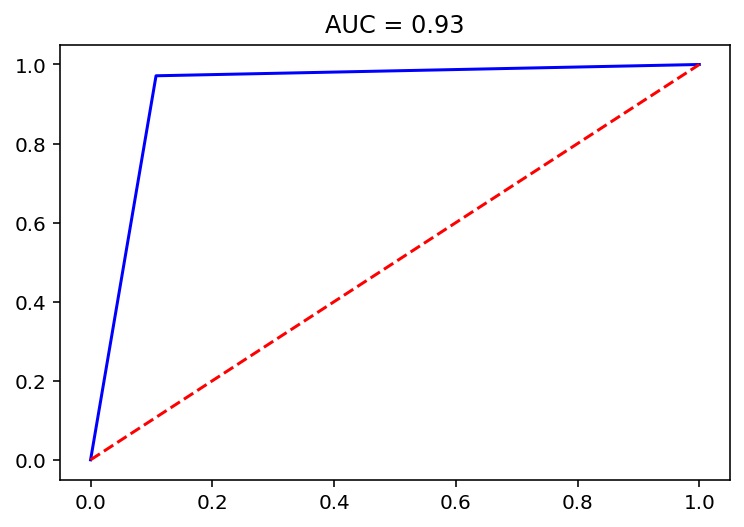

In [18]:
dt_classifier_entropy = DecisionTreeClassifier(criterion = 'entropy',
                                               max_depth = 4)
dt_classifier_entropy.fit(X_train, y_train)
y_pred = dt_classifier_entropy.predict(X_train)

metricas(y_train, y_pred)

Para este conjunto de datos se puede apreciar que los resultados son similares.

### Random forest
Random forest es una combinación de árboles de decisión entrenados cada uno con un subconjunto de los datos originales. Esto permite obtener modelos más estables

En *scikit-learn* el constructor con el que se pueden crear modelo tipo Random Forest es `RandomForestClassifier`. Este constructor requiere más parámetros que el árbol de decisión ya que se le ha de indicar el número de modelos de árbol a utilizar, para lo que se puede utilizar el parámetro `n_estimators`. Por otro lado, como la selección de los datos a utilizar para en cada submodelo es una buena idea fijar la semilla para garantizar que los resultados sean repetibles.

Con esto en mente se puede crear un modelo para el conjunto de datos de ejemplo.

La matriz de confusión es 
[[915  15]
 [  5 940]]
Precisión: 0.9893333333333333
Exactitud: 0.9842931937172775
Exhaustividad: 0.9947089947089947
AUC: 0.9892899812254651


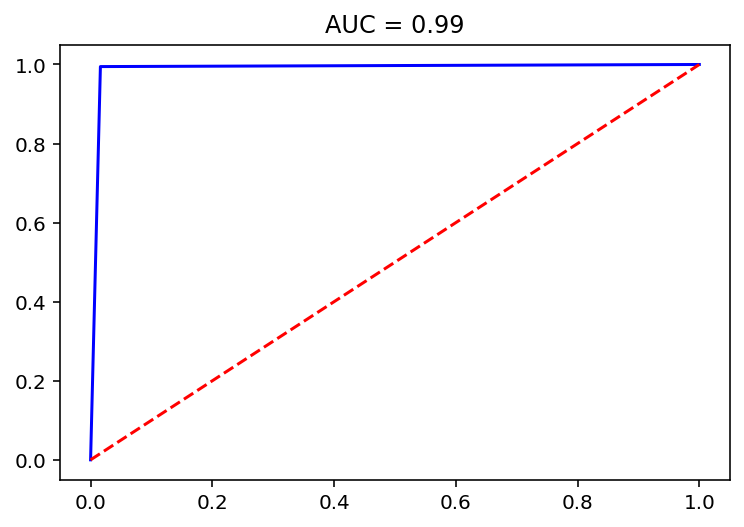

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators = 5,
                                       random_state = 1)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_train)

metricas(y_train, y_pred)

El modelo parece ha sobreajustado, esto se puede comprobar utilizando el conjunto de datos de test.

La matriz de confusión es 
[[289  33]
 [ 18 285]]
Precisión: 0.9184
Exactitud: 0.8962264150943396
Exhaustividad: 0.9405940594059405
AUC: 0.9190547936781256


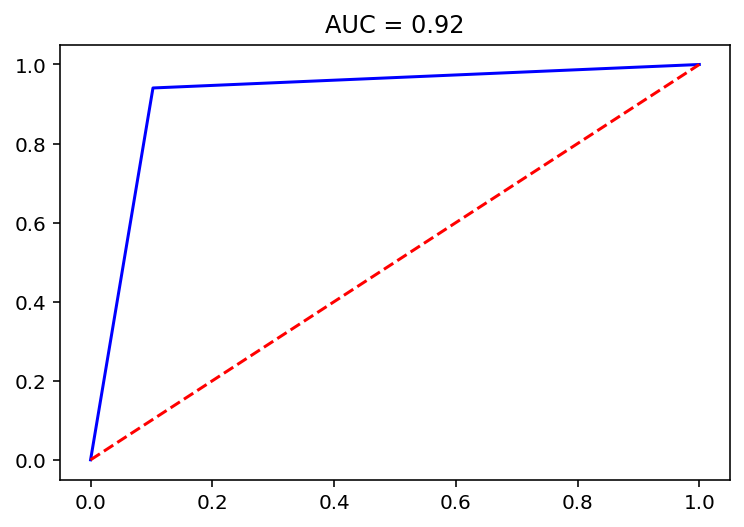

In [20]:
y_test_pred = rf_classifier.predict(X_test)

metricas(y_test, y_test_pred)

Al igual que en los arboles de decisión se ha de fijar la profundidad máxima a la que puede llegar el modelo. Para ello se utiliza el mismo parámetro que antes.

La matriz de confusión es 
[[834  96]
 [ 36 909]]
Precisión: 0.9296
Exactitud: 0.9044776119402985
Exhaustividad: 0.9619047619047619
AUC: 0.9293394777265745


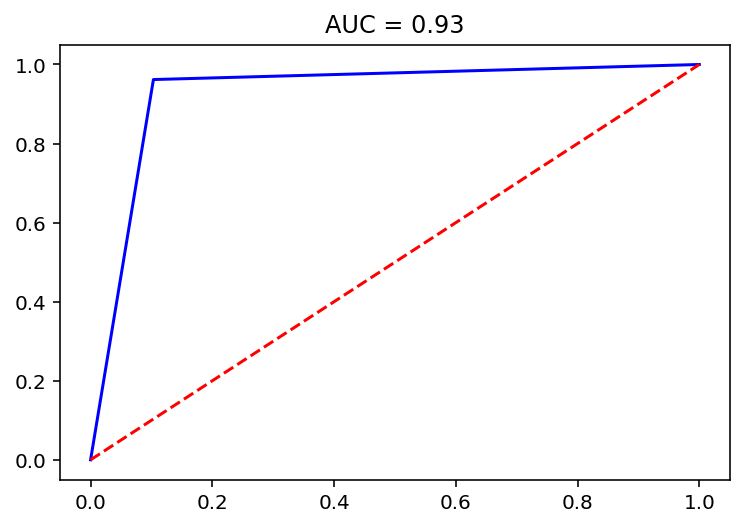

In [21]:
rf_classifier = RandomForestClassifier(n_estimators = 5,
                                       max_depth = 4,
                                       random_state = 1)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_train)

metricas(y_train, y_pred)

Ahora se puede comprobar con mayor confianza el resultado que se obtiene en el conjunto de test.

La matriz de confusión es 
[[286  36]
 [ 10 293]]
Precisión: 0.9264
Exactitud: 0.8905775075987842
Exhaustividad: 0.966996699669967
AUC: 0.9275977287169711


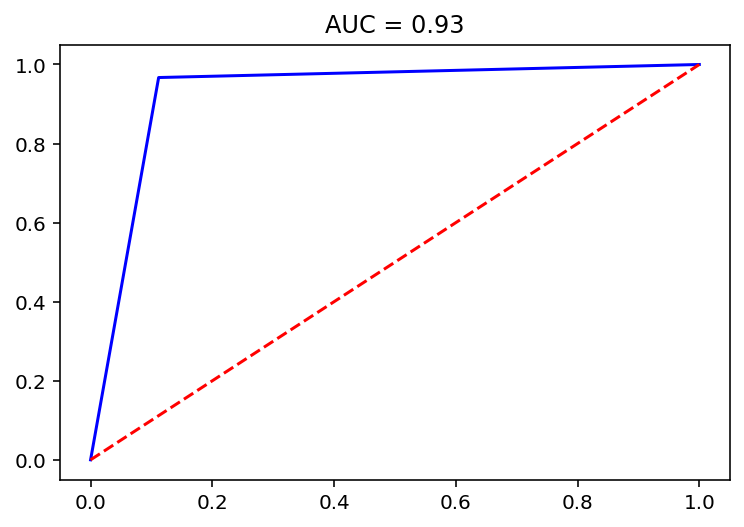

In [22]:
y_test_pred = rf_classifier.predict(X_test)

metricas(y_test, y_test_pred)

Observándose que ahora ya no existe sobreajuste en el modelo.

### Máquinas de vectores de soporte
Las máquinas de vectores de soporte (SVM, "Support vector machines") busca un hiperplano que permite separar de forma óptima los putos de una clase de la de otra.

En *scikit-learn* el constructor con el que se pueden crear los modelos de este tipo es SVC. A modo de ejemplo se puede implementar uno para el conjunto de datos de ejemplo.

La matriz de confusión es 
[[846  84]
 [ 29 916]]
Precisión: 0.9397333333333333
Exactitud: 0.916
Exhaustividad: 0.9693121693121693
AUC: 0.939494794333504


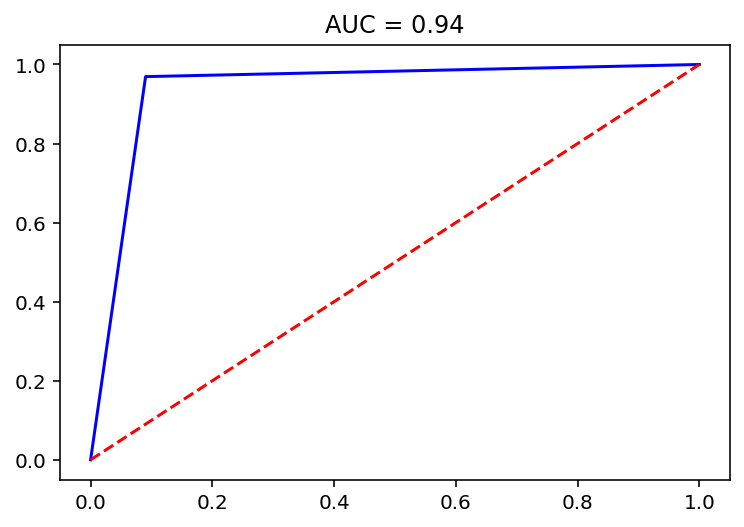

In [23]:
from sklearn.svm import SVC

svm_classifier = SVC().fit(X_train, y_train)
y_pred         = svm_classifier.predict(X_train)

metricas(y_train, y_pred)

Pudiéndose validar los resultados mediante el conjunto de test.

La matriz de confusión es 
[[287  35]
 [ 10 293]]
Precisión: 0.928
Exactitud: 0.8932926829268293
Exhaustividad: 0.966996699669967
AUC: 0.9291505237480269


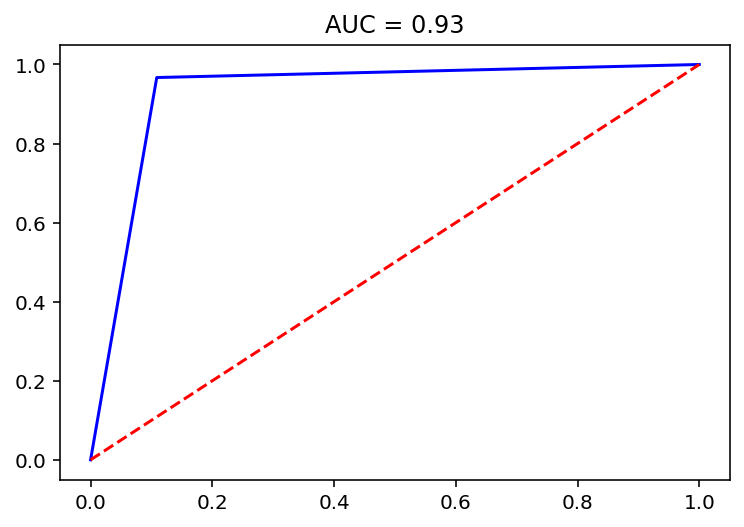

In [24]:
y_test_pred = svm_classifier.predict(X_test)

metricas(y_test, y_test_pred)

En este caso se observa que el modelo no aparenta estar sobreajustado.

### Vecinos más cercanos
Al hablar de vecinos más cercanos se hace referencia a una familia de métodos de clasificación no paramétricos en los que se determina la clase a la que pertenece un elemento en función de las clases de los elemento más proximos conocidos. En *scikit-learn* existen dos algoritmos para clasificar en base a los vecinos más cercanos:
* `KNeighborsClassifier`: implementa el algoritmo de los k vecinos más cercanos (k-nn, k-nearest neighbors).
* `RadiusNeighborsClassifie`: implementa un algoritmo de votación de los vecinos en un radio fijo.

El constructor `KNeighborsClassifier` necesita que se le indique el número de vecinos que utiliza para realizar la clasificación. Con este constructor se puede crear un modelo utilizando de clasificación como el que se muestra a continuación.

La matriz de confusión es 
[[812 118]
 [ 50 895]]
Precisión: 0.9104
Exactitud: 0.8835143139190523
Exhaustividad: 0.9470899470899471
AUC: 0.9101041133299197


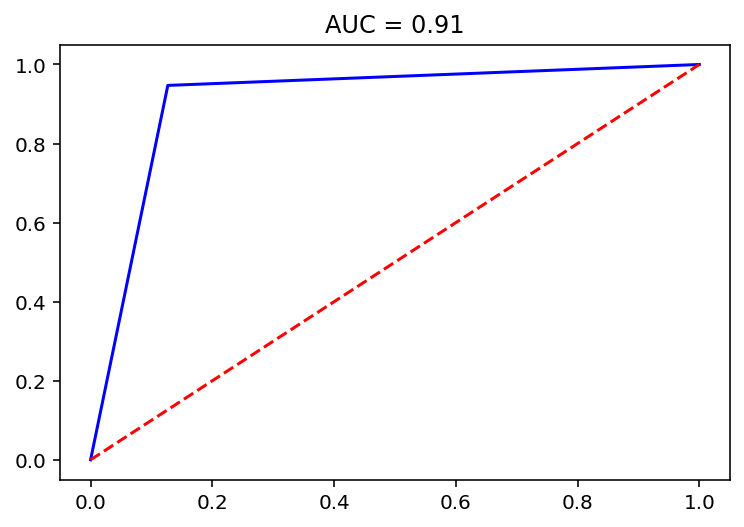

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors = 25)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_train)

metricas(y_train, y_pred)

Al igual que en los casos anteriores es necesario validar la calidad del modelo con el conjunto de datos de test.

La matriz de confusión es 
[[272  50]
 [ 11 292]]
Precisión: 0.9024
Exactitud: 0.8538011695906432
Exhaustividad: 0.9636963696369637
AUC: 0.9042084332656869


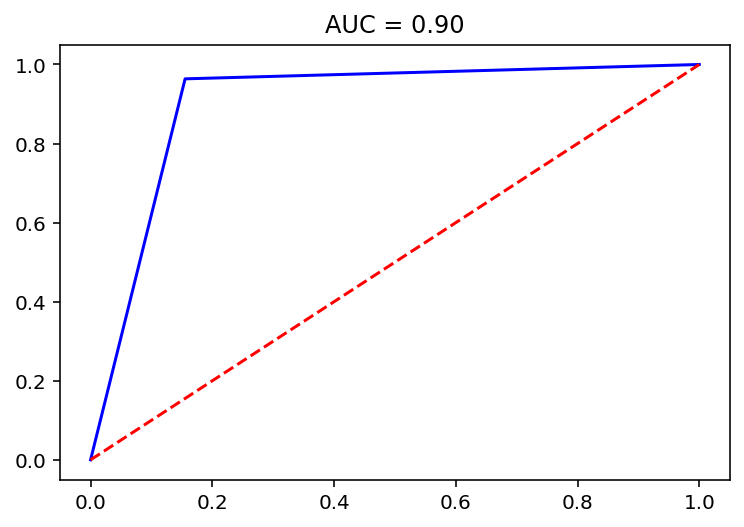

In [26]:
y_test_pred = knn_classifier.predict(X_test)

metricas(y_test, y_test_pred)

Este modelo no aparenta estar sobreajustado.

Por otro lado, el constructor `RadiusNeighborsClassifie` requiere que se le indique el radio en el que buscara los vecinos. En esta ocasión es aconsejable asignar un valor a los elementos para elementos en los que pueden encontrar vecinos en el radio indicado; ya que, a diferencia del caso anterior, es posible que el algoritmo no puede obtener una predicción para algunos elementos. Esto se puede hacer con la propiedad `outlier_label`. Un modelo de ejemplo con los datos anteriores se puede observar en el siguiente código.

La matriz de confusión es 
[[802 128]
 [ 34 911]]
Precisión: 0.9136
Exactitud: 0.8768046198267565
Exhaustividad: 0.964021164021164
AUC: 0.9131933777095067


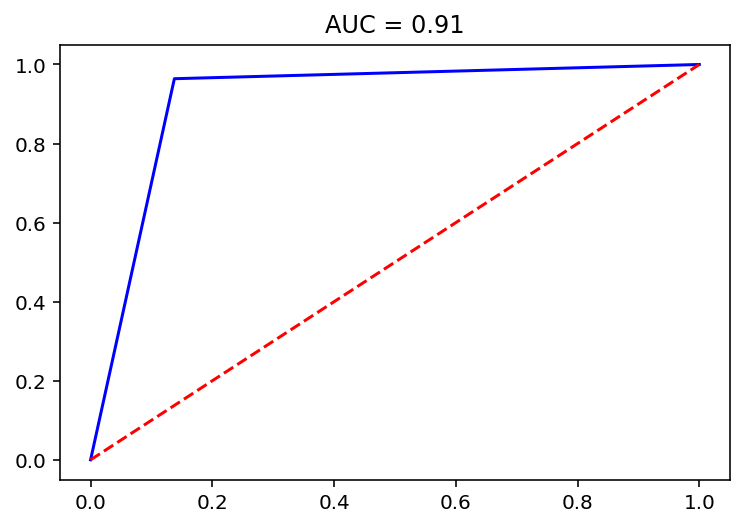

In [27]:
from sklearn.neighbors import RadiusNeighborsClassifier

rn_classifier = RadiusNeighborsClassifier(radius = 3,
                                          outlier_label = 0)
rn_classifier.fit(X_train, y_train)
y_pred         = rn_classifier.predict(X_train)

metricas(y_train, y_pred)

Al igual que en los casos anteriores se puede llevar a cabo una validación de los resultados.

La matriz de confusión es 
[[273  49]
 [ 14 289]]
Precisión: 0.8992
Exactitud: 0.8550295857988166
Exhaustividad: 0.9537953795379538
AUC: 0.9008107332472378


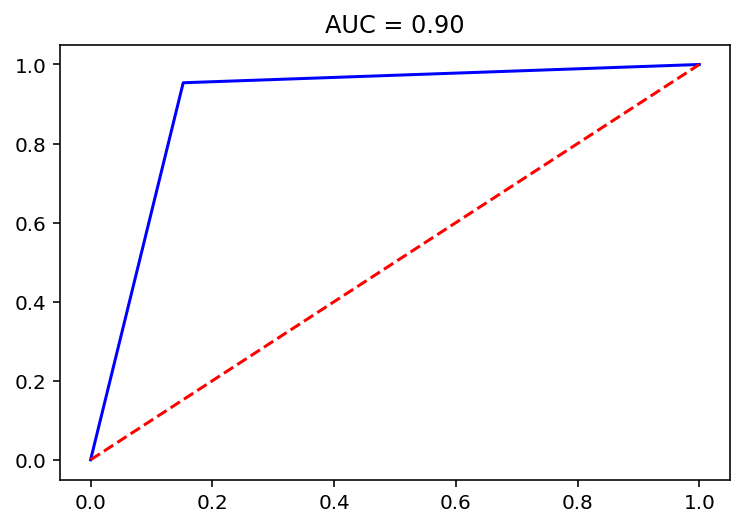

In [28]:
y_test_pred = rn_classifier.predict(X_test)

metricas(y_test, y_test_pred)

## Selección de características
En los conjuntos de datos utilizados para la creación de modelos generalmente existen características que no son adecuadas para la creación de los mismos. El motivo puede ser múltiple, desde valores que son constantes o identificadores, pasando por colineales y otros que, simplemente, nos son útiles para realizar las predicciones buscadas. En *scikit-learn* existes varios métodos para la identificación y eliminación de estas características.

Los datos utilizados hasta ahora son sintéticos, para probar estas técnicas se han de utilizar datos reales, para lo que se procede a la carga de un conjunto de datos de precios de la vivienda en Boston que se encuentran dentro de los ejemplos de *scikit-learn*.

In [29]:
from sklearn.datasets import load_boston

boston = load_boston()

### Eliminar características con baja varianza
El primer paso puede ser eliminar las características que no varían una cantidad suficiente. Para esto se puede utilizar el constructor ` VarianceThreshold` al que se le ha de indicar la varianza mínima que ha de tener una característica.

In [30]:
from sklearn.feature_selection import VarianceThreshold

var_th = VarianceThreshold(threshold = 0.25)
x_var = var_th.fit_transform(boston.data)

print(u"Número de características originales", boston.data.shape[1])
print(u"Número de características finales", x_var.shape[1])
print(u"\nListado de características originales", boston['feature_names'])
print(u"Listado de características finales", boston['feature_names'][var_th.get_support()])

Número de características originales 13
Número de características finales 11

Listado de características originales ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Listado de características finales ['CRIM' 'ZN' 'INDUS' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO' 'B' 'LSTAT']


Una vez realizado el ajuste con el método ` fit_transform` se puede utilizar el método `transform` para transformar nuevos conjuntos de datos y el método `get_support` para obtener un vector con los valores de las columnas que pasan el corte.

### Selección univariante de las mejores características
Antes de crear un modelo se puede utilizar los constructores `SelectKBest` o `SelectPercentile` para seleccionar crear objetos que permitan seleccionar las `k` mejores características o un porcentaje de las mismas respectivamente para la creación de un modelo. En ambos casos se ha de ha de indicar el criterio a utilizar para ordenarlas. En *scikit-learn* existen dos métodos que se pueden utilizar según el tipo de problema con el que se esté trabajando:

* `f_regression` para modelos de regressión
* `chi2` para modelos de clasificación

A modo de ejemplo se pueden seleccionar las 5 mejores características del conjunto de datos del precio de la vivienda en Boston para un modelo de regresión.`

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression 

var_sk = SelectKBest(f_regression, k = 5)
x_sk = var_sk.fit_transform(boston.data, boston.target)

print(u"Número de características finales", x_sk.shape[1])
print(u"Listado de características finales", boston['feature_names'][var_sk.get_support()])

Número de características finales 5
Listado de características finales ['INDUS' 'RM' 'TAX' 'PTRATIO' 'LSTAT']


Se puede observar que se han seleccionado 5 características como se ha indicado. En el caso de `SelectPercentile` se le ha de indicar el porcentaje de características a seleccionar del conjunto de datos. Por ejemplo, se puede probar seleccionando el 50% las mejores.

In [32]:
from sklearn.feature_selection import SelectPercentile

var_pc = SelectPercentile(f_regression, percentile = 50)
x_pc = var_pc.fit_transform(boston.data, boston.target)

print(u"Número de características finales", x_pc.shape[1])
print(u"Listado de características finales", boston['feature_names'][var_pc.get_support()])

Número de características finales 6
Listado de características finales ['INDUS' 'NOX' 'RM' 'TAX' 'PTRATIO' 'LSTAT']


En este caso se han obtenido 6 características.